# Problem Sheet 4

> Muhammad Mustafa 25850354

> Zunaira Zunaira  10931968

>Zalfa Mohayyudin 12749927

## **Question 4.1**
Evolution of age distribution

In [ ]:
# import libraries
import pandas as pd
import numpy as np
# libraries for visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [17]:
# Load data
df = pd.read_csv("population_us.csv")
df

,year,age,sex,people
0,1850,0,1,1483789
1,1850,0,2,1450376
2,1850,5,1,1411067
3,1850,5,2,1359668
4,1850,10,1,1260099
...,...,...,...,...
565,2000,80,2,3221898
566,2000,85,1,970357
567,2000,85,2,1981156
568,2000,90,1,336303


In [18]:
# Total population by year and age
total_by_year_age = df.groupby(["year", "age"])["people"].sum().reset_index()

# Separate by gender for comparison
male_df = df[df["sex"] == "Male"]
female_df = df[df["sex"] == "Female"]

In [19]:
fig = px.line(
    total_by_year_age,
    x="age",
    y="people",
    color="year",
    animation_frame="year",
    title="US Population Age Distribution Over Time",
    labels={"people": "Population", "age": "Age"},
    range_y=[0, total_by_year_age["people"].max()]
)

fig.update_layout(width=900, height=500)
fig.show()

In [20]:
# Filter for year 2000
year = 1990
df_year = df[df["year"] == year]

# Separate male and female data
male = df_year[df_year["sex"] == 1]
female = df_year[df_year["sex"] == 2]


In [21]:
# Sort by age for consistent plotting
male = male.sort_values("age")
female = female.sort_values("age")

# Get ages and population counts
ages = male["age"]
male_population = male["people"]
female_population = female["people"]


C:\Users\Mustafa\AppData\Local\Temp\ipykernel_8576\3300195924.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



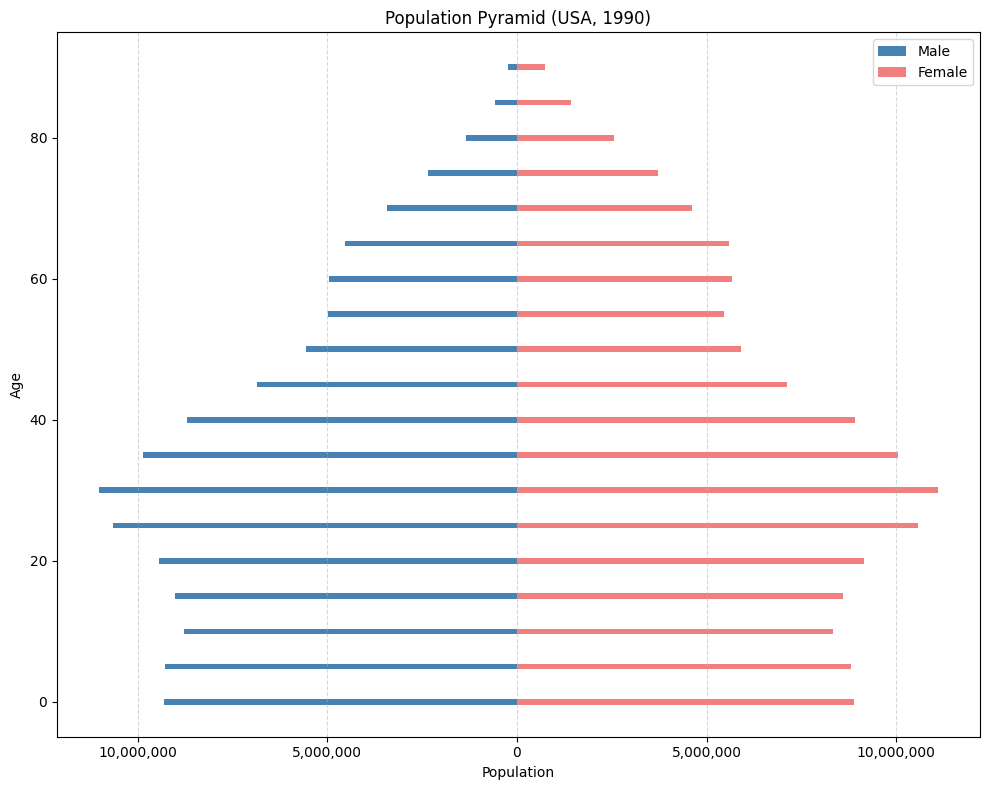

In [22]:
# Create the pyramid
fig, ax = plt.subplots(figsize=(10, 8))

# Plot male population on the left (negative values for mirroring)
ax.barh(ages, -male_population, color='steelblue', label='Male')

# Plot female population on the right
ax.barh(ages, female_population, color='lightcoral', label='Female')

# Set labels and title
ax.set_xlabel("Population")
ax.set_ylabel("Age")
ax.set_title(f"Population Pyramid (USA, {year})")
ax.legend(loc='upper right')

# Format x-axis labels to show absolute values
xticks = ax.get_xticks()
ax.set_xticklabels([f"{abs(int(x)):,}" for x in xticks])

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## **Question 4.2**
Central Limit Theorem.

In [23]:
def sample_XN(M, N, seed=None):
    """
    Generate M samples of the random variable X_N.

    Parameters:
    - M (int): Number of samples to generate
    - N (int): Number of x_i variables per sample
    - seed (int, optional): Random seed for reproducibility

    Returns:
    - samples (np.ndarray): Array of shape (M,) with samples of X_N
    """
    if seed is not None:
        np.random.seed(seed)
    
    # Generate MxN matrix of +/-1
    x = np.random.choice([-1, 1], size=(M, N))
    
    # Compute X_N = (1/√N) * sum over axis=1
    X_N = x.sum(axis=1) / np.sqrt(N)
    
    return X_N


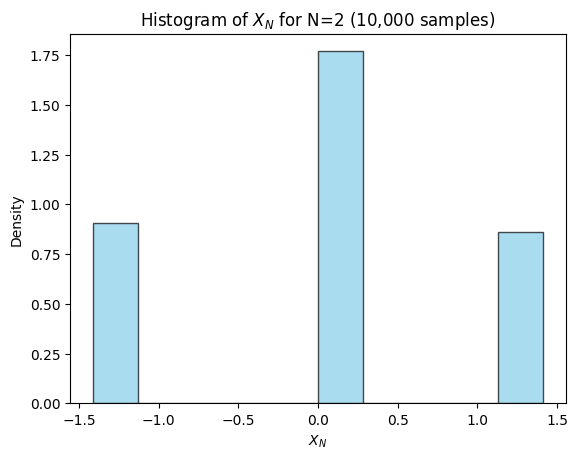

In [24]:
# Generate 10000 samples of X_N for N=2
samples = sample_XN(M=10000, N=2)

plt.hist(samples, density=True, alpha=0.7, color='skyblue', edgecolor='k')
plt.title("Histogram of $X_N$ for N=2 (10,000 samples)")
plt.xlabel("$X_N$")
plt.ylabel("Density")
plt.show()


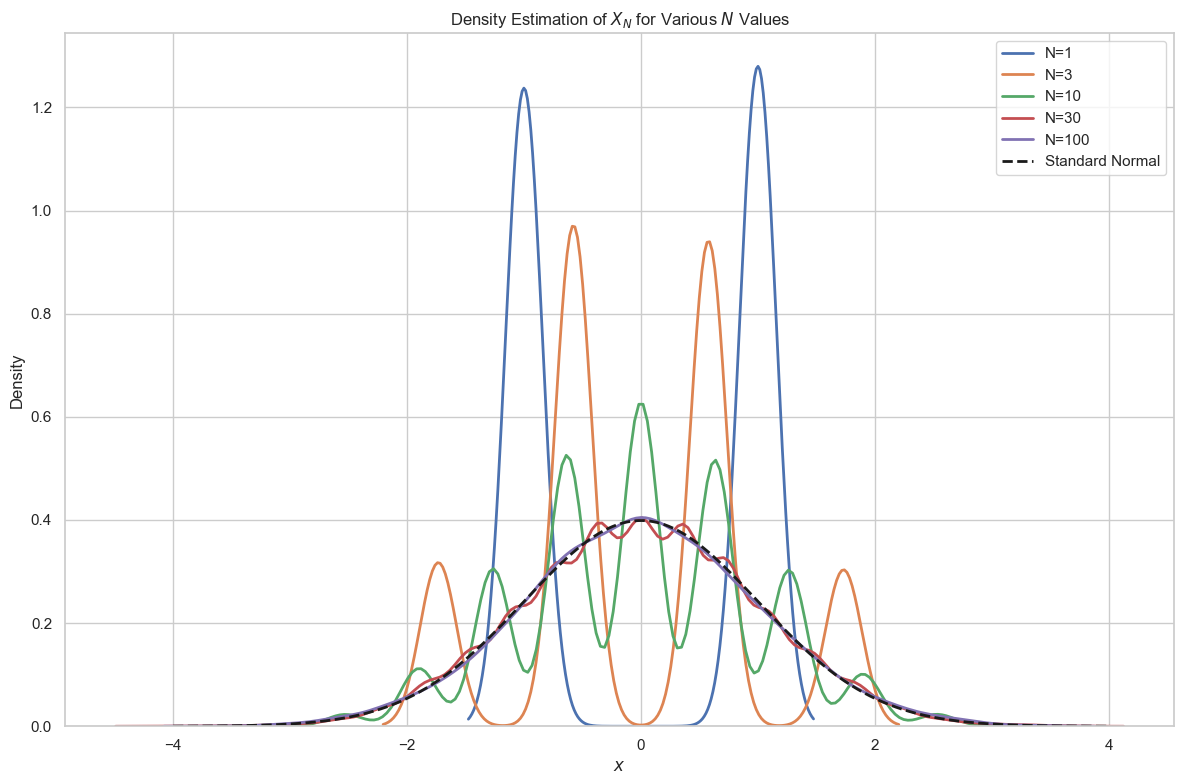

In [25]:
# Parameters
Ns = [1, 3, 10, 30, 100]
M = 10000  # number of samples per N

# Plot
plt.figure(figsize=(12, 8))
x_vals = np.linspace(-4, 4, 1000)
sns.set(style="whitegrid")

for N in Ns:
    samples = sample_XN(M, N)
    sns.kdeplot(samples, label=f"N={N}", linewidth=2)

# Standard normal for comparison
plt.plot(x_vals, norm.pdf(x_vals), 'k--', label="Standard Normal", linewidth=2)

plt.title("Density Estimation of $X_N$ for Various $N$ Values")
plt.xlabel("$x$")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()
